# Exploring the Relationship and Performance of ETH-USD and ^GSPC

In [1]:
# importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv files list
df_eth = pd.read_csv(r'csv/eth_daily_5yr_data.csv')
df_snp500 = pd.read_csv(r'csv/snp500_daily_5yr_data.csv')

In [3]:
df_eth

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP
0,11/9/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327"
1,11/10/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738"
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828"
3,11/12/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579"
4,11/13/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756"
...,...,...,...,...,...,...,...,...
2123,9/2/2023,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996,"$196,796,363,892"
2124,9/3/2023,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318,"$196,688,728,216"
2125,9/4/2023,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912,"$195,913,396,980"
2126,9/5/2023,1629.911011,1645.948364,1610.141235,1633.629395,1633.629395,4417491902,"$196,391,969,143"


In [4]:
df_snp500

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME
0,11/9/2017,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3844100000
1,11/10/2017,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3489740000
2,11/13/2017,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3405200000
3,11/14/2017,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3643580000
4,11/15/2017,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3586590000
...,...,...,...,...,...,...,...
1459,8/30/2023,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000
1460,8/31/2023,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000
1461,9/1/2023,4530.600098,4541.250000,4501.350098,4515.770020,4515.770020,3246260000
1462,9/5/2023,4510.060059,4514.290039,4496.009766,4496.830078,4496.830078,3526250000


In [5]:
df_eth.shape

(2128, 8)

In [6]:
df_snp500.shape

(1464, 7)

In [7]:
df_eth.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJUSTED_CLOSE', 'VOLUME',
       'MARKET_CAP'],
      dtype='object')

In [8]:
df_snp500.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJUSTED_CLOSE', 'VOLUME'], dtype='object')

In [9]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            2128 non-null   object 
 1   OPEN            2128 non-null   float64
 2   HIGH            2128 non-null   float64
 3   LOW             2128 non-null   float64
 4   CLOSE           2128 non-null   float64
 5   ADJUSTED_CLOSE  2128 non-null   float64
 6   VOLUME          2128 non-null   int64  
 7   MARKET_CAP      2128 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 133.1+ KB


In [10]:
df_snp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            1464 non-null   object 
 1   OPEN            1464 non-null   float64
 2   HIGH            1464 non-null   float64
 3   LOW             1464 non-null   float64
 4   CLOSE           1464 non-null   float64
 5   ADJUSTED_CLOSE  1464 non-null   float64
 6   VOLUME          1464 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.2+ KB


In [11]:
df_eth.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP
0,11/9/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327"
1,11/10/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738"
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828"
3,11/12/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579"
4,11/13/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756"


In [12]:
df_snp500.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME
0,11/9/2017,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3844100000
1,11/10/2017,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3489740000
2,11/13/2017,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3405200000
3,11/14/2017,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3643580000
4,11/15/2017,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3586590000


the data 'Pre-processing' process

In [13]:
# calculating the percentage change in the 'ADJUSTED_CLOSE' column and storing it in the '%_CHANGE' column
# df_eth dataset
df_eth['%_CHANGE'] = df_eth['ADJUSTED_CLOSE'].pct_change()
# df_snp500 dataset
df_snp500['%_CHANGE'] = df_snp500['ADJUSTED_CLOSE'].pct_change()

In [14]:
# converting the 'DATE' column to a datetime data type
# df_eth dataset
df_eth['DATE'] = df_eth['DATE'].astype('datetime64[ns]')
# df_snp500 dataset
df_snp500['DATE'] = df_snp500['DATE'].astype('datetime64[ns]')

In [15]:
# replacing the index number to the 'DATE' column
df_eth.set_index('DATE', inplace=True)
df_snp500.set_index('DATE', inplace=True)

In [16]:
df_eth

,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP,%_CHANGE
DATE,,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327",NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738",-0.067411
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828",0.051555
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579",-0.021523
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756",0.028606
...,...,...,...,...,...,...,...,...
2023-09-02,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996,"$196,796,363,892",0.005241
2023-09-03,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318,"$196,688,728,216",-0.000554
2023-09-04,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912,"$195,913,396,980",-0.003950


In [17]:
df_snp500

,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,%_CHANGE
DATE,,,,,,,
2017-11-09,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3844100000,NaN
2017-11-10,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3489740000,-0.000898
2017-11-13,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3405200000,0.000984
2017-11-14,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3643580000,-0.002310
2017-11-15,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3586590000,-0.005526
...,...,...,...,...,...,...,...
2023-08-30,4500.339844,4521.649902,4493.589844,4514.870117,4514.870117,3064110000,0.003833
2023-08-31,4517.009766,4532.259766,4507.390137,4507.660156,4507.660156,3946360000,-0.001597
2023-09-01,4530.600098,4541.250000,4501.350098,4515.770020,4515.770020,3246260000,0.001799


In [18]:
# counting the number of duplicated rows for 'updated_eth_data' dataset
df_eth.duplicated().sum()

0

In [19]:
# counting the number of duplicated rows for 'updated_snp500_data' dataset
df_snp500.duplicated().sum()

0

In [20]:
# counting the number of missing values in each columns for 'updated_eth_data' dataset
df_eth.isnull().sum()

OPEN              0
HIGH              0
LOW               0
CLOSE             0
ADJUSTED_CLOSE    0
VOLUME            0
MARKET_CAP        0
%_CHANGE          1
dtype: int64

In [21]:
# counting the number of missing values in each columns for 'updated_snp500_data' dataset
df_snp500.isnull().sum()

OPEN              0
HIGH              0
LOW               0
CLOSE             0
ADJUSTED_CLOSE    0
VOLUME            0
%_CHANGE          1
dtype: int64

In [22]:
# displaying the first 5 rows of the updated DataFrame of the 'updated_eth_data' dataset
df_eth.head()

,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP,%_CHANGE
DATE,,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327",NaN
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738",-0.067411
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828",0.051555
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579",-0.021523
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756",0.028606


In [23]:
# displaying the first 5 rows of the updated DataFrame of the 'updated_snp500_data' dataset
df_snp500.head()

,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,%_CHANGE
DATE,,,,,,,
2017-11-09,2584.000000,2586.500000,2566.330078,2584.620117,2584.620117,3844100000,NaN
2017-11-10,2580.179932,2583.810059,2575.570068,2582.300049,2582.300049,3489740000,-0.000898
2017-11-13,2576.530029,2587.659912,2574.479980,2584.840088,2584.840088,3405200000,0.000984
2017-11-14,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3643580000,-0.002310
2017-11-15,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3586590000,-0.005526


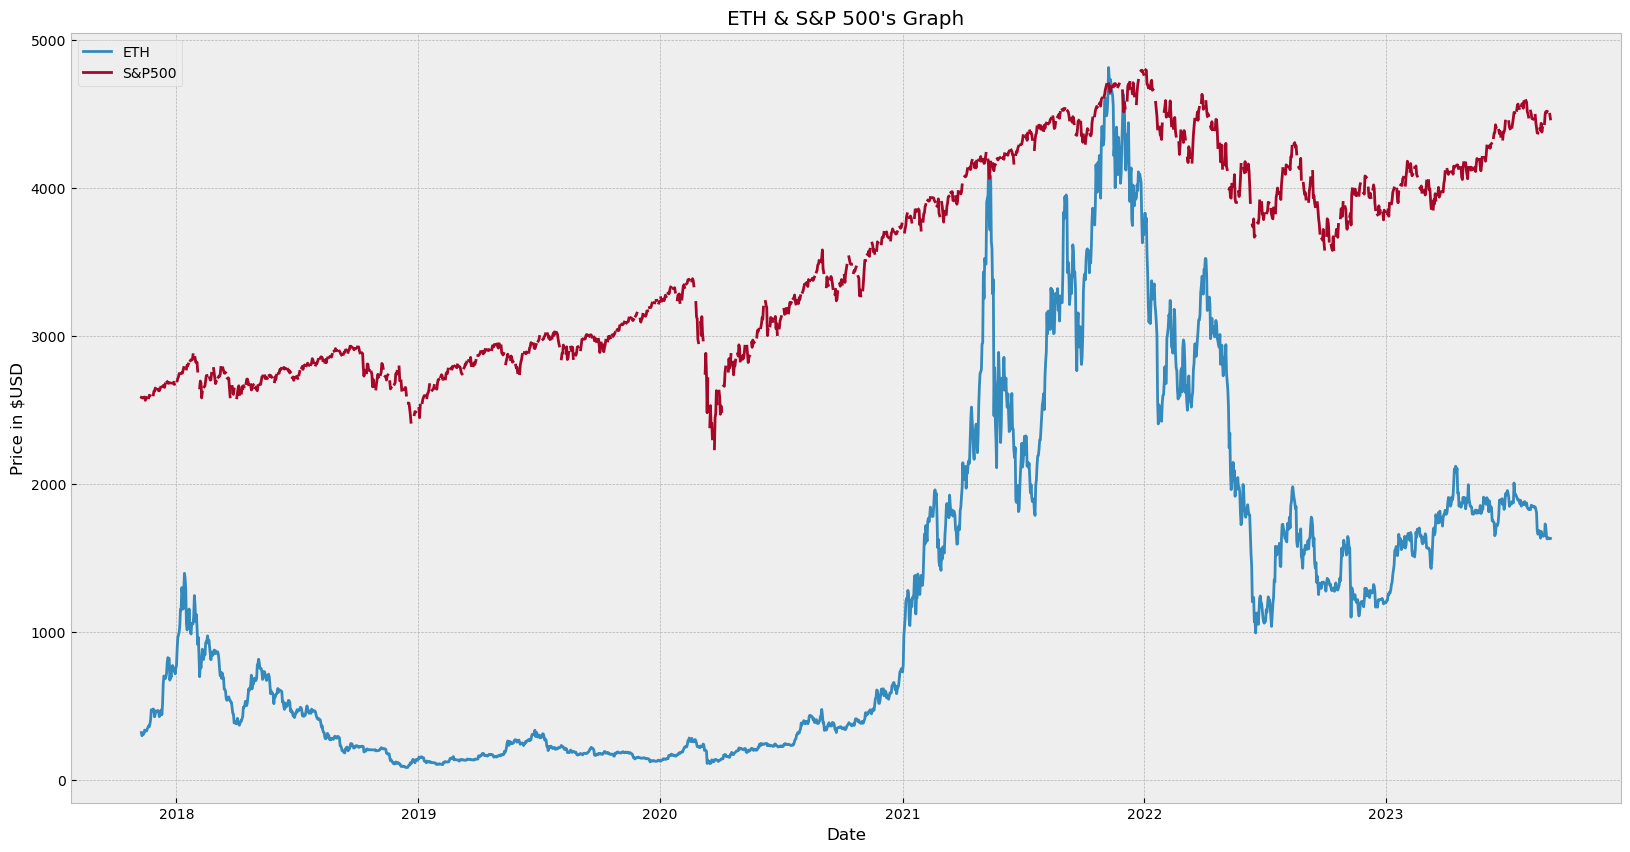

In [24]:
# creating a dataframe containing both symbol's closing prices
df_closep_values = pd.DataFrame({'ETH': df_eth['ADJUSTED_CLOSE'],
                                 'S&P500': df_snp500['ADJUSTED_CLOSE']})

# visualizing the closing prices of both datasets
plt.style.use('bmh')

plt.figure(figsize=(20, 10))
for c in df_closep_values.columns.values:
    plt.plot(df_closep_values[c], label=c)

plt.title('ETH & S&P 500\'s Graph')
plt.xlabel('Date')
plt.ylabel('Price in $USD')
plt.legend(df_closep_values.columns.values, loc='upper left')
plt.show()

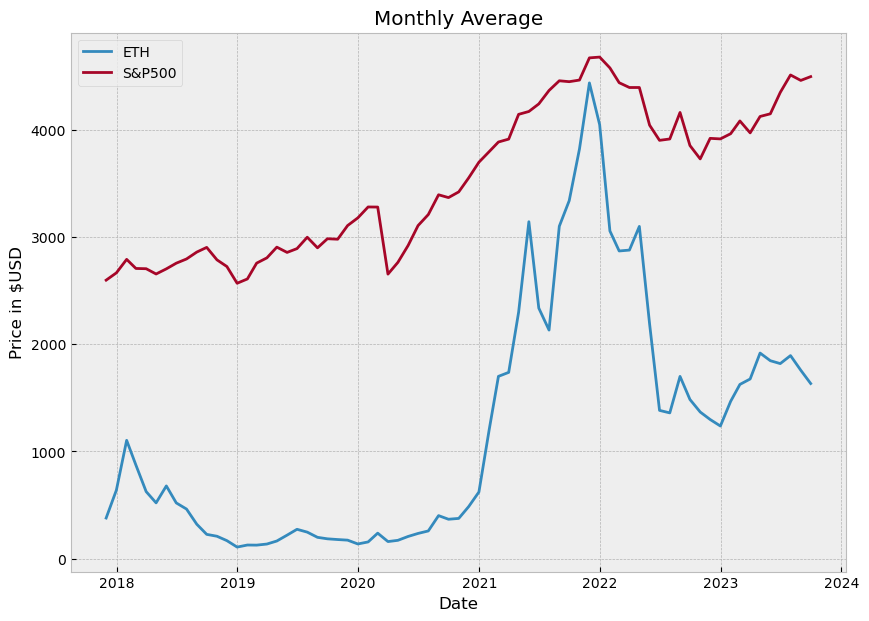

In [25]:
# monthly average price
resampled_data_monthly = df_closep_values.resample('M').mean()

# creating the chart
plt.figure(figsize=(10, 7))
plt.plot(resampled_data_monthly.index, resampled_data_monthly.values)
plt.xlabel('Date')
plt.ylabel('Price in $USD')
plt.title('Monthly Average')
plt.legend(resampled_data_monthly.columns.values)
plt.show()

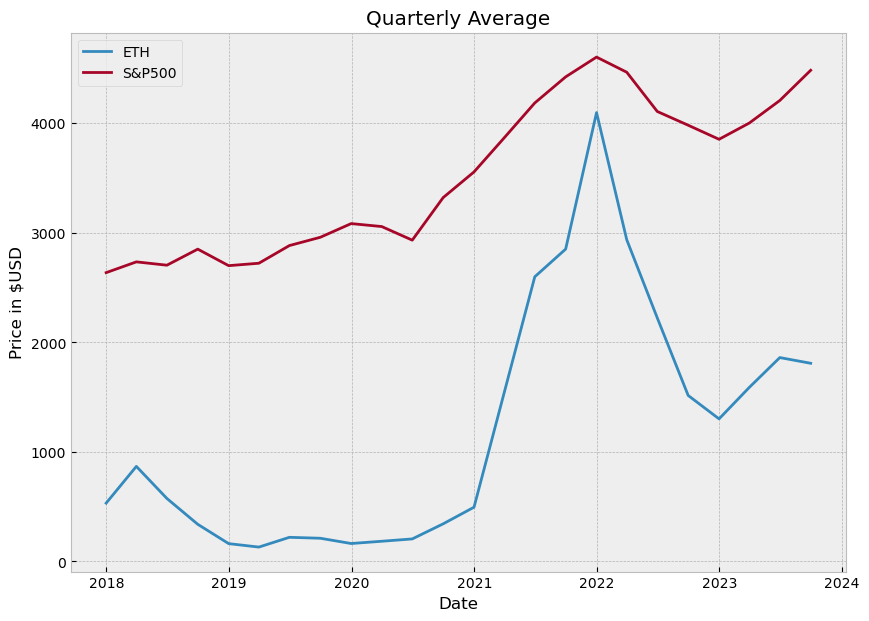

In [26]:
# quarterly average price
resampled_data_quarterly = df_closep_values.resample('Q').mean()

# creating the chart
plt.figure(figsize=(10, 7))
plt.plot(resampled_data_quarterly.index, resampled_data_quarterly.values)
plt.xlabel('Date')
plt.ylabel('Price in $USD')
plt.title('Quarterly Average')
plt.legend(resampled_data_quarterly.columns.values)
plt.show()

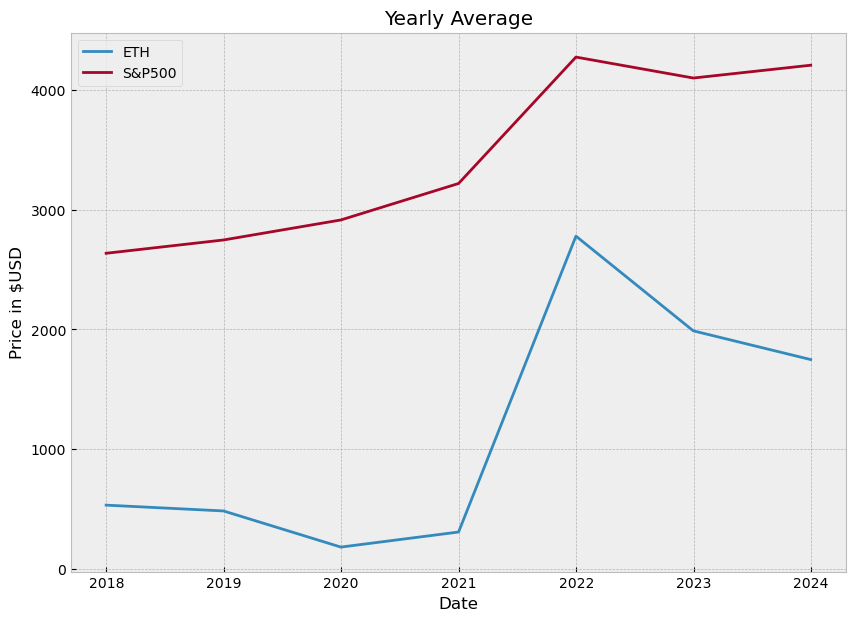

In [27]:
# yearly average price
resampled_data_yearly = df_closep_values.resample('Y').mean()

# creating the chart
plt.figure(figsize=(10, 7))
plt.plot(resampled_data_yearly.index, resampled_data_yearly.values)
plt.xlabel('Date')
plt.ylabel('Price in $USD')
plt.title('Yearly Average')
plt.legend(resampled_data_yearly.columns.values)
plt.show()

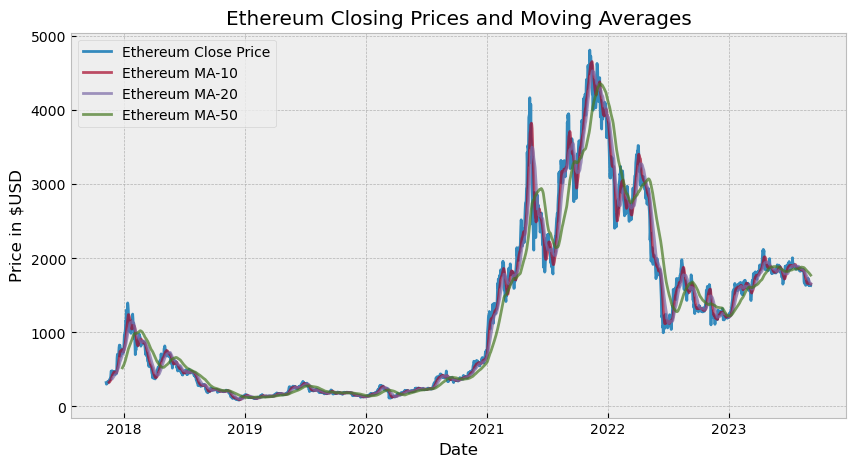

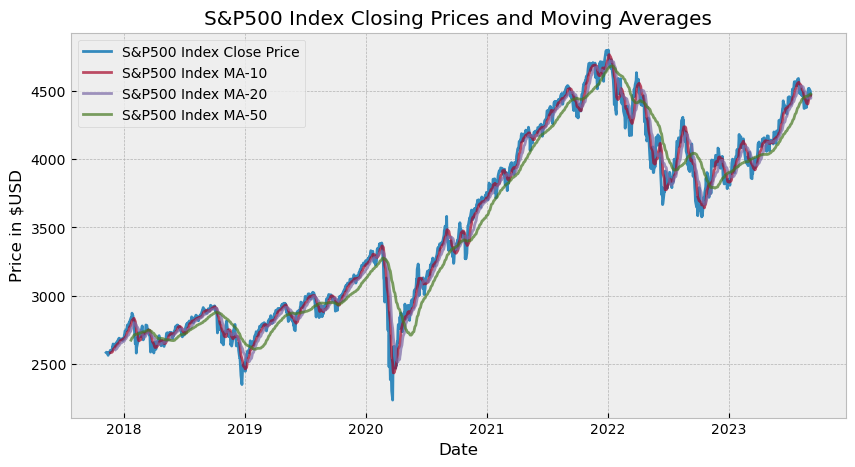

In [28]:
# creating a 10, 20, and 50 moving average chart based on the closing price.
def plotting_price_and_MA(df, title):
    '''visualizing the 10, 20, and 50 moving avergage prices based on the 'CLOSE' price of stocks.'''
    close_col_name = f'{title} Close Price'
    df_close = pd.DataFrame({close_col_name: df['ADJUSTED_CLOSE']})

    # defining the moving averages - 10, 20, and 50
    ma_day = [10, 20, 50]

    # calculating moving averages
    for ma in ma_day:
        ma_col_name = f'{title} MA-{ma}'
        df_close[ma_col_name] = df_close[close_col_name].rolling(ma).mean()

    # creating a single chart
    plt.figure(figsize=(10, 5))

    # 1. plotting the closing price
    plt.plot(df_close.index, df_close[close_col_name],
             label=f'{title} Close Price', linewidth=2)

    # 2. plotting the moving averages
    for ma in ma_day:
        ma_column_name = f'{title} MA-{ma}'
        plt.plot(df_close.index,
                 df_close[ma_column_name], label=f'{title} MA-{ma}', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Price in $USD')
    plt.title(f'{title} Closing Prices and Moving Averages')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()


# displaying chart for ETH-USD
plotting_price_and_MA(df_eth, 'Ethereum')
# displaying chart for S&P 500
plotting_price_and_MA(df_snp500, 'S&P500 Index')

Q: Correlational or Not?

In [29]:
# calculating the correlation matrix for the 'ADJUSTED_CLOSE' price
df_closep_values.corr()

,ETH,S&P500
ETH,1.000000,0.872074
S&P500,0.872074,1.000000


<Axes: >

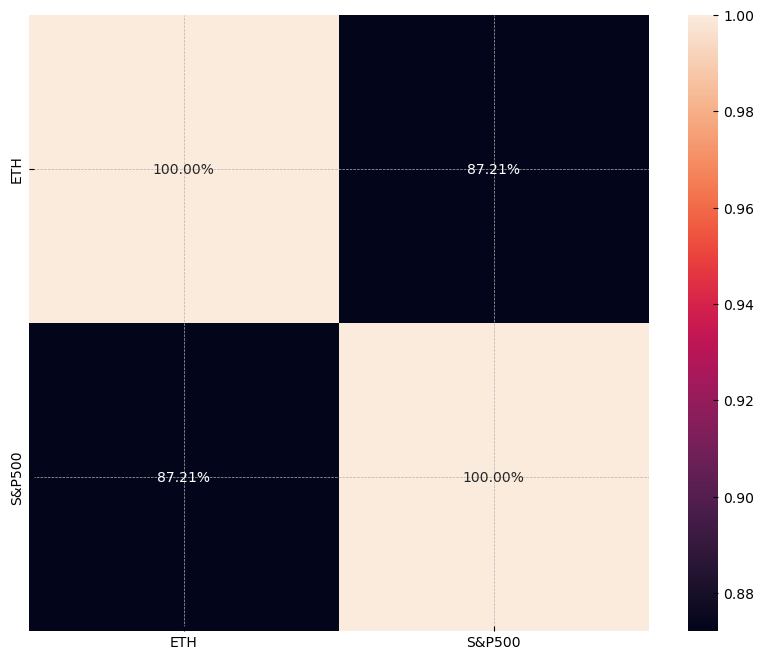

In [30]:
# creating a heatmap to visualize the correlation
plt.subplots(figsize=(10, 8))
sns.heatmap(df_closep_values.corr(), annot=True, fmt='.2%')

Q: Which is volatile?

In [31]:
# creating a dataframe containing both symbol's % change
df_pct_change_values = pd.DataFrame({'ETH': df_eth['%_CHANGE'],
                                     'S&P500': df_snp500['%_CHANGE']})

In [32]:
# getting the volatility rates
print('The % change volatility rates:')
df_pct_change_values.std()

The % change volatility rates:


ETH       0.048309
S&P500    0.013114
dtype: float64

Text(0.5, 1.0, 'ETH vs. S&P500 % Change')

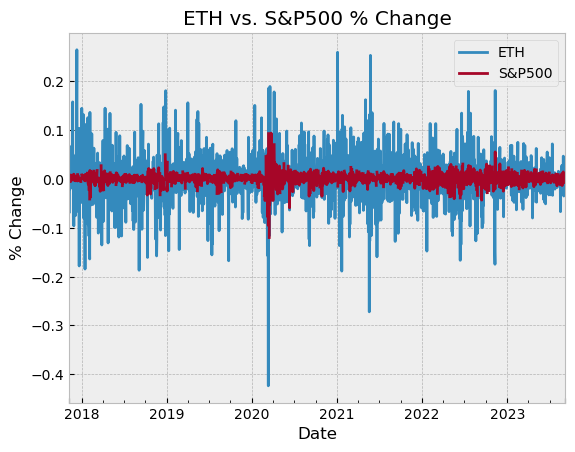

In [33]:
# visualizing the daily % change, and the volatility
ax = df_pct_change_values.plot(style=['-'])

ax.set_xlabel('Date')
ax.set_ylabel('% Change')
plt.title('ETH vs. S&P500 % Change')

What_If? : What if I invested 1$, how much would the return be?

In [34]:
# getting the daily cumulative simple returns
daily_cumulative_simple_returns = (df_pct_change_values+1).cumprod()

# showing the data
daily_cumulative_simple_returns

,ETH,S&P500
DATE,,
2017-11-09,NaN,NaN
2017-11-10,0.932589,0.999102
2017-11-11,0.980669,NaN
2017-11-12,0.959562,NaN
2017-11-13,0.987011,1.000085
...,...,...
2023-09-02,5.101611,NaN
2023-09-03,5.098782,NaN
2023-09-04,5.078643,NaN


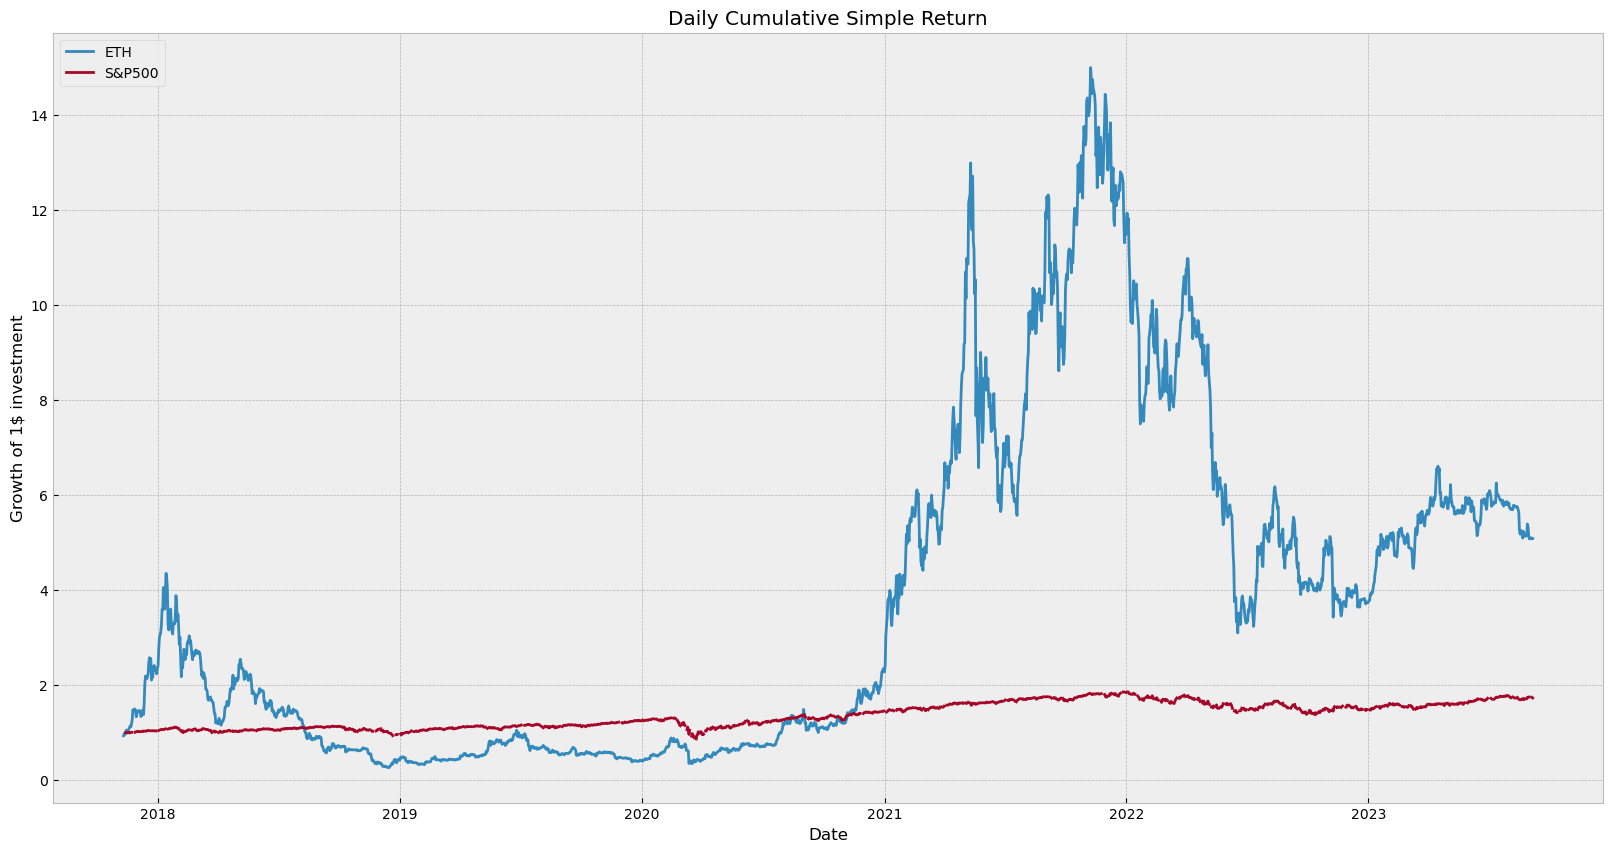

In [35]:
# visualizing the daily cumulative simple returns
plt.figure(figsize=(20, 10))
for c in daily_cumulative_simple_returns.columns.values:
    plt.plot(daily_cumulative_simple_returns.index,
             daily_cumulative_simple_returns[c], lw=2, label=c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Date')
plt.ylabel('Growth of 1$ investment')
plt.legend(daily_cumulative_simple_returns.columns.values,
           loc='upper left', fontsize=10)
plt.show()